In [1]:
#pragma nodebook off
%load_ext nodebook.ipython
%nodebook memory earth

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt

In [4]:
cd ..

/home/alemi/projects/simplefermi


In [5]:
import simplefermi as s

In [6]:
import simplefermi.dotplots as dp

In [7]:
q = s.lognormal(1, 3) * s.u("ft")
q

1.73282674399265 (1.0 to 3.0) [foot] {length}

In [8]:
s.u.setup_matplotlib(True)

In [9]:
import numpy as np

In [10]:
f_temp = lambda albedo: (((1 - albedo) * s.solar_constant / 4 / s.stefan_boltzmann)**(1/4)).to_base_units()

In [11]:
albedos = np.linspace(0, 1, 300)

lows = []
mids = []
highs = []

for a in albedos:
    low, mid, high = np.quantile(f_temp(a), [0.05, 0.50, 0.95]) / s.u.kelvin
    lows.append(low)
    mids.append(mid)
    highs.append(high)

/home/alemi/.local/share/virtualenvs/simplefermi-wYOVx0AN/lib/python3.9/site-packages/numpy/core/shape_base.py:65: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ary = asanyarray(ary)


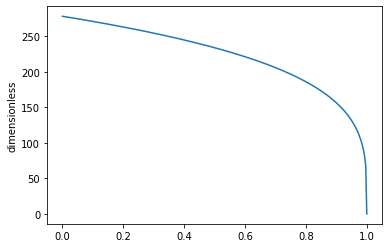

In [12]:
plt.plot(albedos, mids)
plt.fill_between(albedos, lows, highs, alpha=0.3)

In [26]:
albedo = s.lognormal(0.23, 0.35)
data = np.array([0.19049301778258634, 0.20592247583568993, 0.19180015639436118, 0.1819985784419023, 0.2060740270288852, 0.17337961131791185, 0.19275784564129167, 0.1903960362817071, 0.19779151580930265, 0.20063375839041003])
albedo = s.data(data)
temp = (((1-albedo) * s.solar_constant / 4 / s.stefan_boltzmann)**(1/4)).to_base_units()
temp

263.8424951893091 (262.7 to 264.7) [kelvin] {temperature}

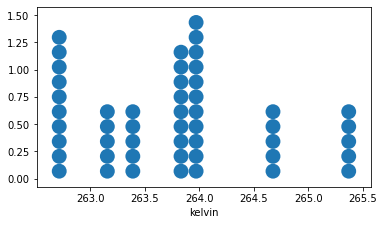

In [27]:
fig, axs = dp.dotplot(temp.magnitude, log=False)
#axs.xaxis.set_units(temp.units)
axs.set_xlabel(temp.units);
#axs.axvline(255*s.K, color="tab:blue")
#axs.axvline(288*s.K, color="tab:red")
#axs.set_xlim((230, 290))

In [34]:
from scipy import stats

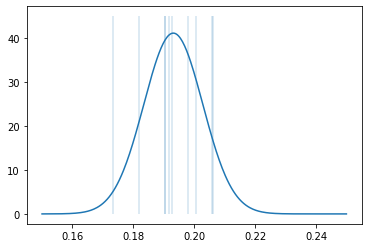

In [35]:
dist = stats.norm(data.mean(), data.std())
xs = np.linspace(0.15, 0.25, 300)
plt.plot(xs, dist.pdf(xs))
plt.vlines(data, 0, 45, alpha=0.2)